In [1]:
import torch

In [22]:
# creating a tensor on which autograd will perform differentiation
x = torch.tensor(3.0, requires_grad=True)

In [ ]:
y = x**2
print(x)
print(y) # grad_fn=<PowBackward0> it is coming from computation graph which says that power function was applied on y

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)
tensor(6., grad_fn=<MulBackward0>)


In [ ]:
# to run the autograd on y and z, we have a function backward()
y.backward() # dy/dx (x**2) = 2x ; where x = 3

In [ ]:
x.grad 

tensor(6.)

#### Let's do it for multiple derivations of a equation like
$y = x^2$  
$z = sin(y)$

to get $\frac{dz}{dx}$ we have to find $\frac{dz}{dy} * \frac{dy}{dx}$

In [41]:
x = torch.tensor(3.0, requires_grad=True)
y = x**2
z = torch.sin(y)

print(x)
print(y)
print(z)

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)
tensor(0.4121, grad_fn=<SinBackward0>)


In [ ]:
# pytorch will do all the operations we just have to run z.backward()
# computational graph will look something like this
# x -> (power of 2) -> y -> (sin) 
z.backward()

In [ ]:
x.grad

# y.grad connot use gradients are calculated only for leaf tensor in the computational graph

tensor(-5.4668)

### Lets do the same think on a simple neural network which will look like this

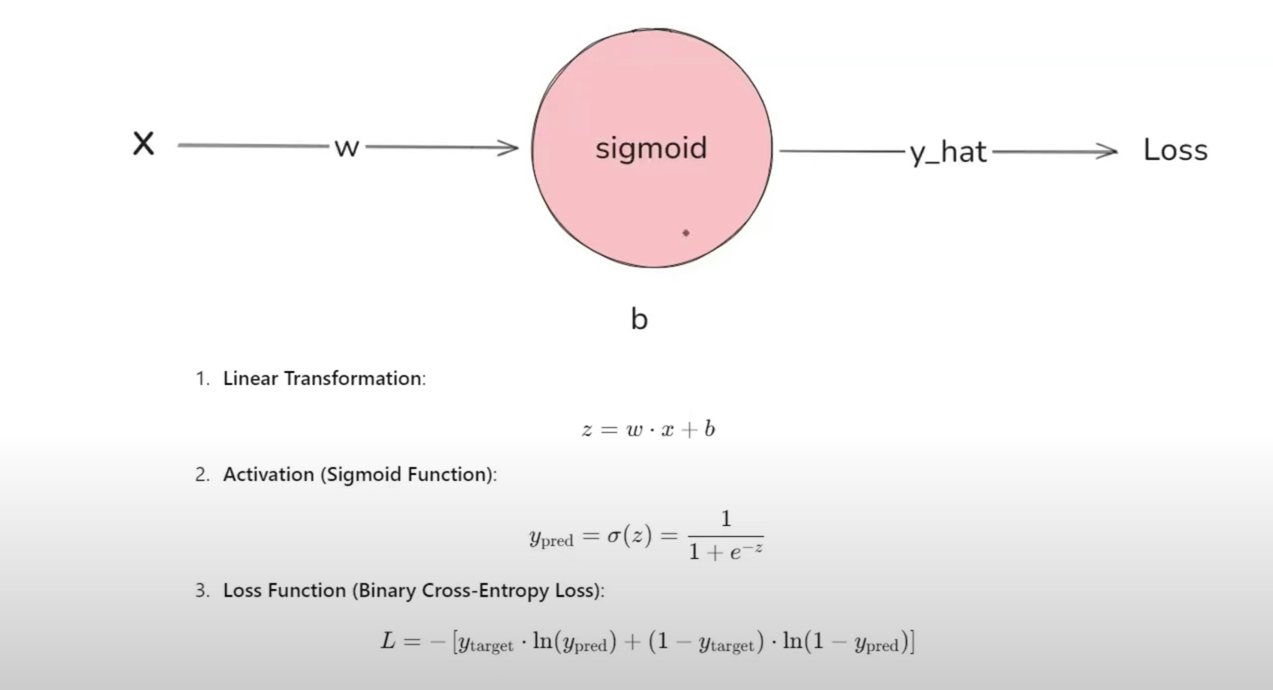

### we have to found the gradient of w and b as their are the starting leaf tensors using partial differentiations as output depends on both w and b

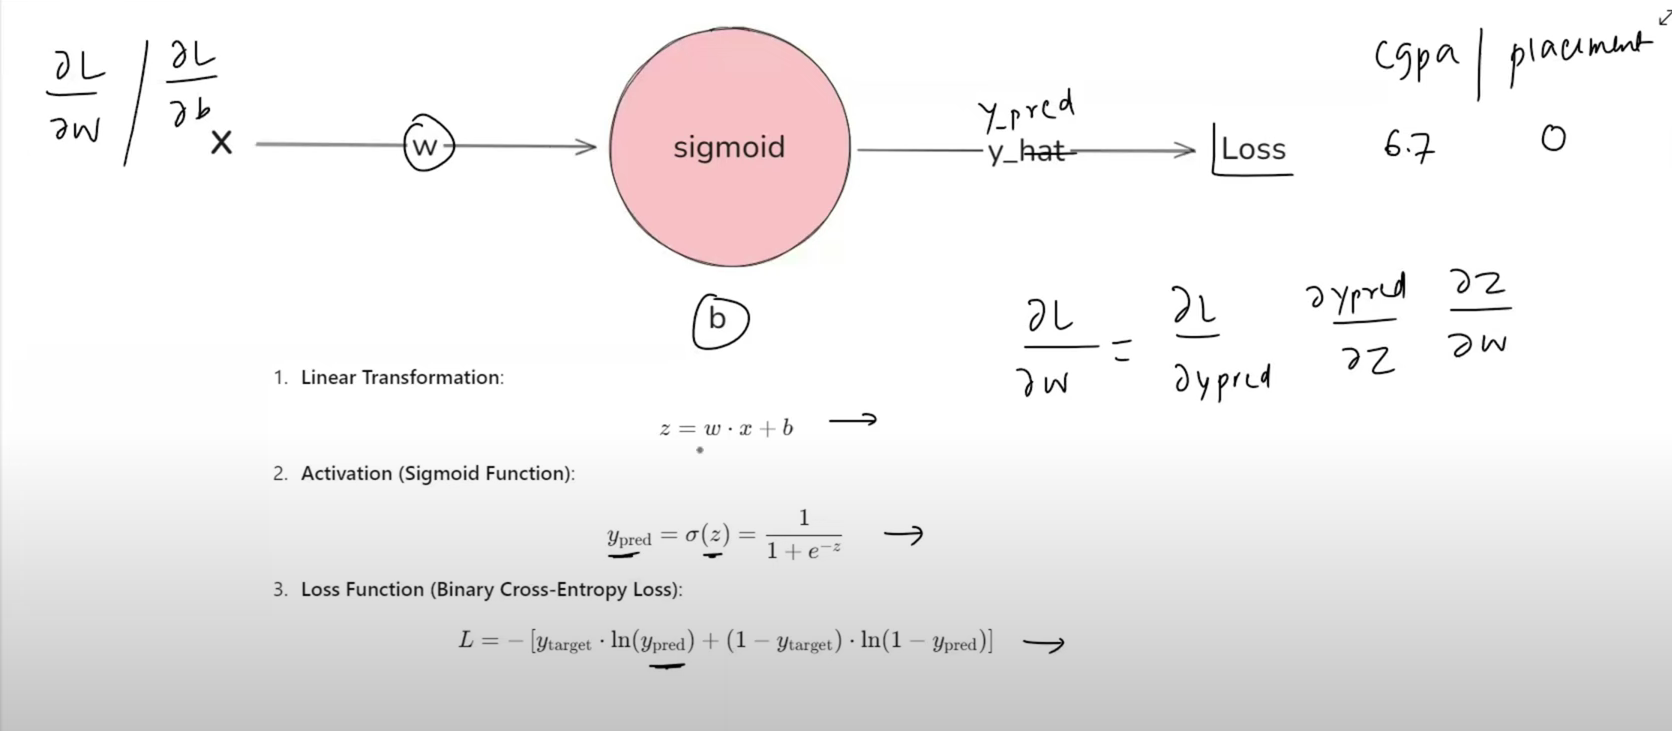
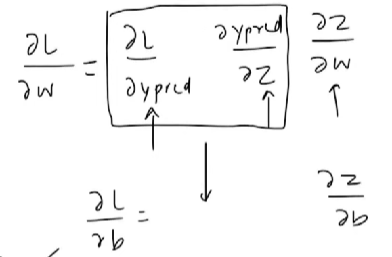
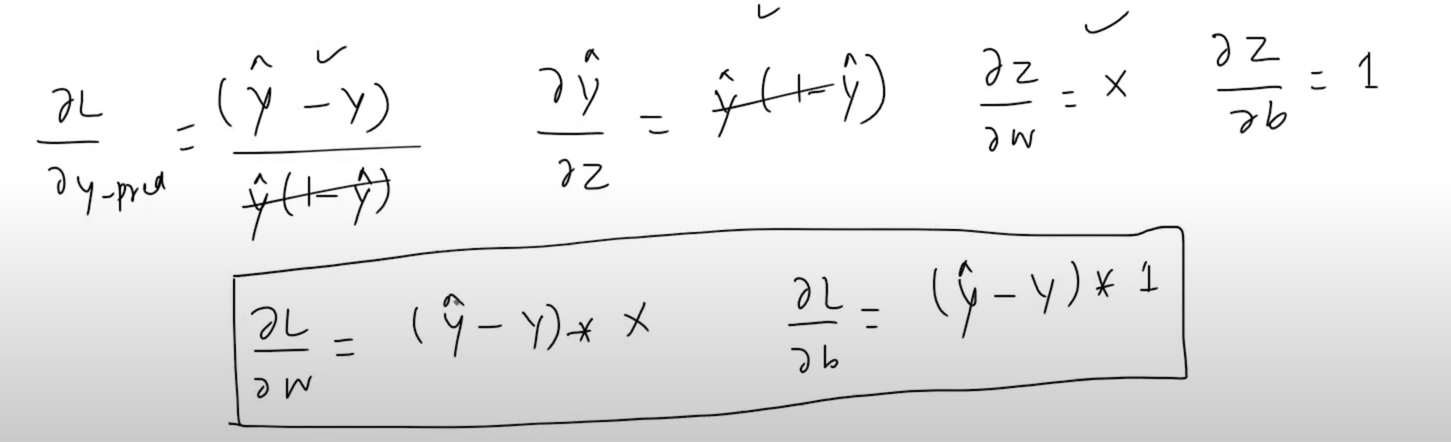

## First, lets do it manually

In [44]:
# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [45]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [46]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [47]:
loss

tensor(6.7012)

In [48]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [49]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


## Now, let's use Pytorch Autograd and see how much time and effort it will save

In [50]:
#initializing inputs
x = torch.tensor(6.7)
y = torch.tensor(0.0)
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [51]:
print(w,b)

tensor(1., requires_grad=True) tensor(0., requires_grad=True)


In [52]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [53]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [54]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

### Computation graph
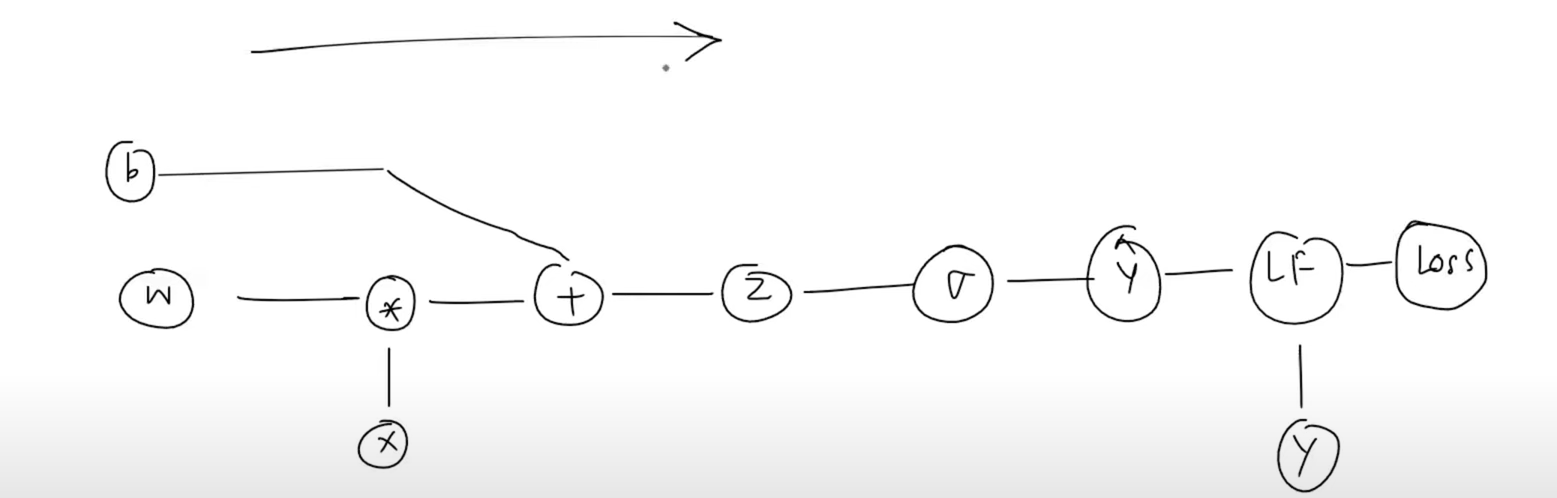

In [55]:
#let's find out the gradients now
loss.backward()

In [56]:
print(w.grad)
print(b.grad)
# output same as manual work but with not hassle to write entire code for each function

tensor(6.6918)
tensor(0.9988)


#### we can also apply auto grad to multi-dimension tensors as well

In [59]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


In [60]:
y = (x**2).mean()
print(y)

tensor(4.6667, grad_fn=<MeanBackward0>)


In [61]:
y.backward()

In [62]:
print(x.grad)

tensor([0.6667, 1.3333, 2.0000])


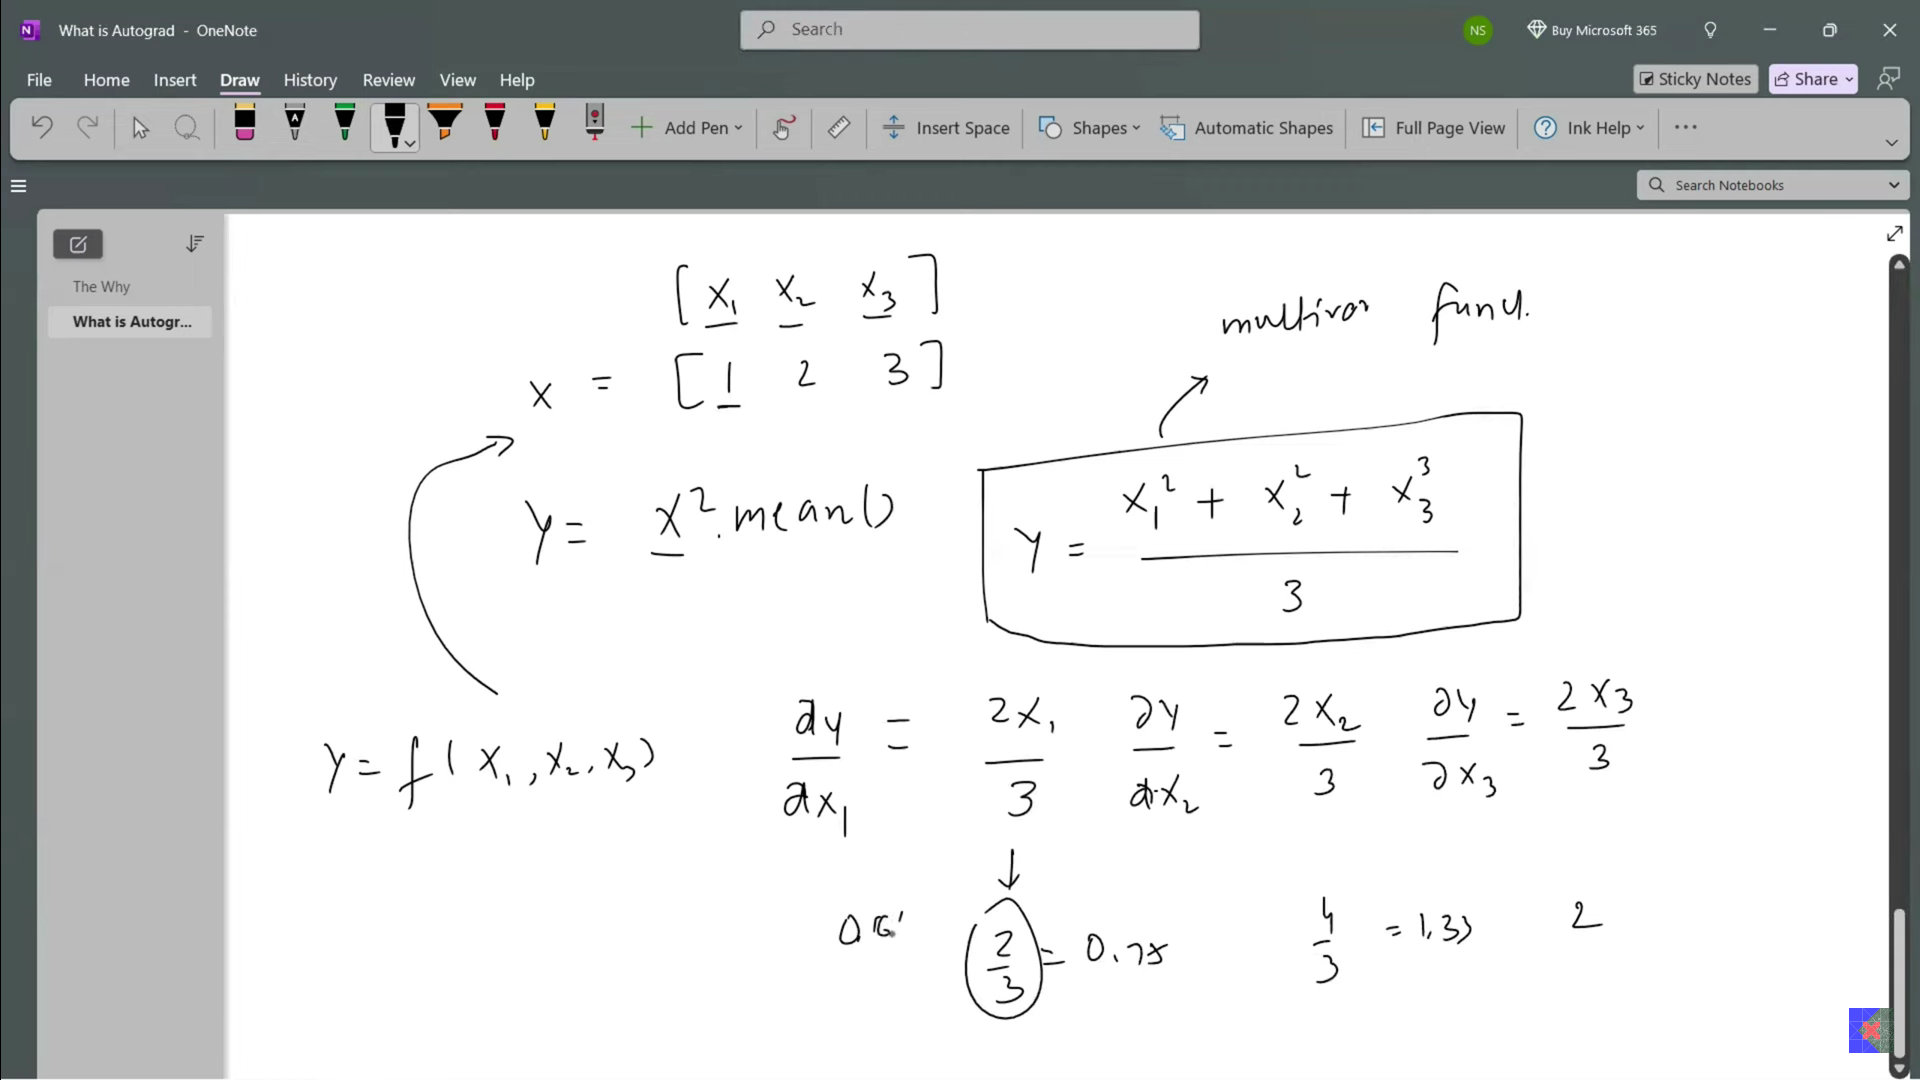

In [63]:
# clearing grad
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [64]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [65]:
y.backward()

In [66]:
x.grad

tensor(4.)

In [68]:
x.grad.zero_()
# we do this so that gradient of x does not accumulate and we get wrong outputs

tensor(0.)

In [69]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [70]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [71]:
y.backward()

In [72]:
x.grad

tensor(4.)

In [73]:
# option 1 - requires_grad_(False)
x.requires_grad_(False)

# option 2 - detach()
z = x.detach() #this will create a copy of x but without autograd tracking

# option 3 - torch.no_grad()
x = torch.tensor(2.0, requires_grad=True)
with torch.no_grad():
    y = x**2
    print(y)

tensor(4.)


In [74]:
y.backward() # does not work as y computation graph did not tracked while creating using torch.no_grad()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn